<a href="https://colab.research.google.com/github/guydav/deep-learning-projects/blob/master/notebooks/CNN_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!kill -9 -1

# Resources used/encountered while working on this

Colab & GPU:

https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d

https://medium.com/@oribarel/getting-the-most-out-of-your-google-colab-2b0585f82403?fbclid=IwAR02sUAHdrAJAKDbxXYNhKx3bOyZk7U8EnlsRY73_7xWMT7QHdSengZmp3c

https://colab.research.google.com/drive/16nkLsNCzKd3lpiZzkWEhIe_Y-hNr6C2Q#scrollTo=ZqDa9zhe-UPj

Colab & PyTorch:

https://medium.com/@chsafouane/getting-started-with-pytorch-on-google-colab-811c59a656b6

https://jovianlin.io/pytorch-with-gpu-in-google-colab/



# Setup and test GPU and PyTorch

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
!pip install torchsummary
!pip install wandb
!wandb login 9676e3cc95066e4865586082971f2653245f09b4

tcmalloc: large alloc 1073750016 bytes == 0x59088000 @  0x7f434af832a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 1.2MB 15.6MB/s 
    100% |████████████████████████████████| 235kB 26.8MB/s 
    100% |████████████████████████████████| 102kB 25.6MB/s 
    100% |████████████████████████████████| 450kB 25.6MB/s 
    100% |████████████████████████████████| 51kB 20.0MB/s 
    100% |████████████████████████████████| 92kB 26.1MB/s 
    100% |████████████████████████████████| 256kB 25.1MB/s 
    100% |████████████████████████████████| 71kB 22.9MB/s 
    100% |████████████████████████████████| 184kB 26.1MB/s 
  Running setup.py bdist_wheel for gql ... - done
  Stored in directory: /root/.cache/pip/wheels/a7/8d/65/a3247f500d675d

In [0]:
import torch
print(torch.cuda.current_device())
print(torch.cuda.device(0))
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

0
1
Tesla K80


In [0]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

  Running setup.py bdist_wheel for gputil ... - done
  Stored in directory: /root/.cache/pip/wheels/17/0f/04/b79c006972335e35472c0b835ed52bfc0815258d409f560108
Successfully built gputil
Gen RAM Free: 12.9 GB  | Proc size: 218.6 MB
GPU RAM Free: 11430MB | Used: 11MB | Util   0% | Total 11441MB


# Google Drive Setup

## Auth

In [0]:
# !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
# !wget https://launchpad.net/~alessandro-strada/+archive/ubuntu/google-drive-ocamlfuse-beta/+build/15331130/+files/google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
# !dpkg -i google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
# !apt-get install -f

!add-apt-repository -y ppa:alessandro-strada/google-drive-ocamlfuse-beta
!apt-get update
!apt-get install google-drive-ocamlfuse
!apt-get -y install -qq fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

 Mount Google Drive on Ubuntu (via FUSE): Beta versions
 More info: https://launchpad.net/~alessandro-strada/+archive/ubuntu/google-drive-ocamlfuse-beta
Press [ENTER] to continue or Ctrl-c to cancel adding it.

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Get:3 http://ppa.launchpad.net/alessandro-strada/google-drive-ocamlfuse-beta/ubuntu bionic InRelease [15.4 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [83.2 kB]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release [564 B]
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release.gpg [801 B]
Get:9 http://archive.ubuntu.com/ubun

## Mount

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

## Sync data

In [0]:
!google-drive-ocamlfuse -cc

Clearing cache...done


In [0]:
!ls -la "drive/Research Projects/Meta-Learning/v1/models"

total 48
drwxr-xr-x 2 root root 4096 Nov  9 18:46 .
drwxr-xr-x 2 root root 4096 Nov  7 13:11 ..
drwxr-xr-x 2 root root 4096 Nov  9 18:50 CNN_MLP
drwxr-xr-x 2 root root 4096 Dec  9 16:53 data_augment_mse_larger_pooling_dropout_CNN_MLP
drwxr-xr-x 2 root root 4096 Dec 13 19:56 large_batch_dimension_unit_larger_pooling_dropout_CNN_MLP
drwxr-xr-x 2 root root 4096 Nov 27 23:09 larger_pooling_dropout_CNN_MLP
drwxr-xr-x 2 root root 4096 Dec  4 14:46 mse_larger_pooling_dropout_CNN_MLP
drwxr-xr-x 2 root root 4096 Nov 20 00:46 Pooling_Dropout_CNN_MLP
drwxr-xr-x 2 root root 4096 Nov 21 23:31 pooling_dropout_decay_scheduler_CNN_MLP
drwxr-xr-x 2 root root 4096 Nov 19 17:58 smaller_normalized_CNN_MLP
drwxr-xr-x 2 root root 4096 Nov 28 23:13 task_subset_larger_pooling_dropout_CNN_MLP
drwxr-xr-x 2 root root 4096 Dec 12 13:03 task_subset_mse_larger_pooling_dropout_CNN_MLP


## Clear up old checkpoints

In [0]:
!find "drive/Research Projects/Meta-Learning/v1/models/CNN_MLP" -type f ! -name '*0.pth' -type f !  -name '*5.pth' -type f !  -name 'results*'

In [0]:
!find "drive/Research Projects/Meta-Learning/v1/models/pooling_dropout_decay_scheduler_CNN_MLP" -type f ! -name '*0.pth' -type f !  -name '*5.pth' -type f !  -name 'results*' -delete

# PyTorch

## Define the dataset loader

In [0]:
import torch
from torch.utils.data import Dataset, DataLoader
import random
import h5py

# META_LEARNING_DATA = 'drive/Research Projects/Meta-Learning/v1/CLEVR_meta_learning_uint8.h5'
# Switched to improved format, fixed an ordering bug


class MetaLearningH5Dataset(Dataset):
    def __init__(self, in_file, transform=None, start_index=0,
                end_index=None, query_subset=None):
        super(MetaLearningH5Dataset, self).__init__()
        self.file = h5py.File(in_file, 'r')
        self.transform = transform
        
        self.start_index = start_index
        self.end_index = end_index
        if self.end_index is None:
            self.end_index = self.file['X'].shape[0]

        self.num_images = self.end_index - self.start_index
        self.query_length = self.file['Q'].shape[2]
        self.total_queries_per_image = self.file['Q'].shape[1]
        
        if query_subset is None:
            query_subset = np.arange(self.total_queries_per_image)
        
        self.query_subset = query_subset
        self.active_queries_per_image = len(self.query_subset)
            
    def _compute_indices(self, index):
        image_index = self.start_index + (index // self.active_queries_per_image)
        query_index = index % self.active_queries_per_image
        # index from the query to the subset 
        actual_query_index = self.query_subset[query_index]
        return image_index, actual_query_index

    def __getitem__(self, index):
        image_index, query_index = self._compute_indices(index)
        
        x = self.file['X'][image_index, ...]
        q = self.file['Q'][image_index, query_index, ...]
        y = self.file['y'][image_index, query_index]
        
        # Preprocessing each image
        if self.transform is not None:
            x = self.transform(x)        
        
        return (x, q, y), index
 
    def __len__(self):
        return self.num_images * self.active_queries_per_image
    
    
class MetaLearningH5DatasetFromDescription(MetaLearningH5Dataset):
     def __init__(self, in_file, transform=None, start_index=0,
                 end_index=None, query_subset=None,
                 num_dimensions=2, features_per_dimension=(10, 11)):
        super(MetaLearningH5DatasetFromDescription, self).__init__(
            in_file, transform, start_index, end_index, query_subset)
        
        self.num_dimensions = num_dimensions
        self.features_per_dimension = features_per_dimension
        
     def __getitem__(self, index):
        image_index, query_index = self._compute_indices(index)

        x = self.file['X'][image_index, ...]
        # TODO: for simple queries I can use y, but I will compute y, because I'll need to later
        # y = self.file['y'][image_index, actual_query_index]
       
        desc = self.file['D'][image_index]
        y = int(np.any(desc == query_index))
        q = np.zeros((self.num_dimensions + self.total_queries_per_image,))
        # TODO: generalize for 2-item queries and 3rd dimensions
        q[0] = query_index < self.features_per_dimension[0]
        q[1] = 1 - q[0]
        q[self.num_dimensions + query_index] = 1
        
        # Preprocessing each image
        if self.transform is not None:
            x = self.transform(x)  
            
        return (x, q, y), index

## Define the basic model and training routine

Aided by https://github.com/kimhc6028/relational-networks/blob/master/model.py

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchvision import transforms
from torchsummary import summary

import wandb

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

from collections import defaultdict
from datetime import datetime
import pickle
import os


DEFAULT_SAVE_DIR = 'drive/Research Projects/Meta-Learning/v1/models'
DEFAULT_NUM_EPOCHS = 10
DEFAULT_NUM_BATCHES_TO_PRINT = 100

DEFAULT_CONV_FILTER_SIZES = (24, 24, 24, 24)
DEFAULT_MLP_LAYER_SIZES = (256, 64, 16, 4)

class ConvInputModel(nn.Module):
    def __init__(self, filter_sizes=DEFAULT_CONV_FILTER_SIZES):
        super(ConvInputModel, self).__init__()
        
        self.conv1 = nn.Conv2d(3, filter_sizes[0], 3, stride=2, padding=1)
        self.batchNorm1 = nn.BatchNorm2d(filter_sizes[0])
        self.conv2 = nn.Conv2d(filter_sizes[0], filter_sizes[1], 3, stride=2, padding=1)
        self.batchNorm2 = nn.BatchNorm2d(filter_sizes[1])
        self.conv3 = nn.Conv2d(filter_sizes[1], filter_sizes[2], 3, stride=2, padding=1)
        self.batchNorm3 = nn.BatchNorm2d(filter_sizes[2])
        self.conv4 = nn.Conv2d(filter_sizes[2], filter_sizes[3], 3, stride=2, padding=1)
        self.batchNorm4 = nn.BatchNorm2d(filter_sizes[3])

        
    def forward(self, img):
        """convolution"""
        x = self.conv1(img)
        x = F.relu(x)
        x = self.batchNorm1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.batchNorm2(x)
        x = self.conv3(x)
        x = F.relu(x)
        x = self.batchNorm3(x)
        x = self.conv4(x)
        x = F.relu(x)
        x = self.batchNorm4(x)
        return x

  
class FCOutputModel(nn.Module):
    def __init__(self, layer_sizes=DEFAULT_MLP_LAYER_SIZES, log_softmax=True):
        super(FCOutputModel, self).__init__()

        self.fc2 = nn.Linear(layer_sizes[0], layer_sizes[1])
        self.fc3 = nn.Linear(layer_sizes[1], layer_sizes[2])
        self.fc4 = nn.Linear(layer_sizes[2], layer_sizes[3])
        self.fc5 = nn.Linear(layer_sizes[3], 2)
        self.log_softmax = log_softmax

    def forward(self, x):
        x = self.fc2(x)
        x = F.relu(x)
        # x = F.dropout(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.relu(x)
        x = self.fc5(x)
        if self.log_softmax:
            return F.log_softmax(x, dim=1)
        else:
            return F.softmax(x, dim=1)
  

class BasicModel(nn.Module):
    def __init__(self, name, use_mse=False,
                 save_dir=DEFAULT_SAVE_DIR, mse_threshold=0.5):
        super(BasicModel, self).__init__()
        
        self.name = name
        self.use_mse = use_mse
        self.mse_threshold = mse_threshold
        self.save_dir = save_dir
        self.optimizer = None
        self._init_dir()
        
        self.train_accuracies = []
        self.train_losses = []
        self.test_accuracies = []
        self.test_losses = []
        self.train_aucs = []
        self.test_aucs = []

    def train_(self, input_img, input_query, label):
        if self.optimizer is None:
            self._create_optimizer()
        
        self.optimizer.zero_grad()
        output = self(input_img, input_query)
        
        if self.use_mse:
#             target = np.zeros((64, 2))
#             target[np.arange(output.shape[0]), label.data.numpy()] = 1
#             target = torch.from_numpy(target).to(label.device)
#             loss = F.mse_loss(output, target)
            output = torch.squeeze(output)
            loss = F.mse_loss(output, label.to(torch.float))
            pred = output.data > self.mse_threshold
            pred = pred.to(torch.long)
            
        else:
            loss = F.nll_loss(output, label)
            pred = output.data.max(1)[1]
            
        loss.backward()
        self.optimizer.step()
        
        correct = pred.eq(label.data).cpu().sum()
        accuracy = correct * 100. / len(label)
        auc = roc_auc_score(label.data.cpu().numpy(), pred.cpu().numpy())
        
        return accuracy, loss.item(), auc
        
    def test_(self, input_img, input_query, label, training=False):
        output = self(input_img, input_query)
        
        if self.use_mse:
#             target = np.zeros((64, 2))
#             target[np.arange(output.shape[0]), label.data.numpy()] = 1
#             target = torch.from_numpy(target).to(label.device)
#             loss = F.mse_loss(output, target)
            output = torch.squeeze(output)
            loss = F.mse_loss(output, label.to(torch.float))
            pred = output.data > self.mse_threshold
            pred = pred.to(torch.long)
            
            
        else:
            loss = F.nll_loss(output, label)
            pred = output.data.max(1)[1]
            
        correct = pred.eq(label.data).cpu()
        accuracy = correct.sum() * 100. / len(label)
        auc = roc_auc_score(label.data.cpu().numpy(), pred.cpu().numpy())
        
        return accuracy, loss.item(), auc, correct

    def save_model(self, epoch=None, **kwargs):            
        if epoch is None:
            epoch = len(self.train_accuracies)
        
        torch.save(self.state_dict(), self._save_path(epoch))
            
        results = dict(epoch=epoch, 
                       train_accuracies=self.train_accuracies,
                       train_losses=self.train_losses, 
                       test_accuracies=self.test_accuracies,
                       test_losses=self.test_losses,
                       train_aucs=self.train_aucs,
                       test_aucs=self.test_aucs,
                       **kwargs)
    
        with open(f'{self._save_dir()}/results.pickle', 'wb') as f:
            pickle.dump(results, f)
        
    def load_model(self, epoch=None):
        if epoch == 0:
            print('Warning: asked to load model with epoch 0. Ignoring...')
            return
        
        with open(f'{self._save_dir()}/results.pickle', 'rb') as f:
            results = pickle.load(f)
            
        self.train_accuracies = results.pop('train_accuracies')
        self.train_losses = results.pop('train_losses')
        self.test_accuracies = results.pop('test_accuracies')
        self.test_losses = results.pop('test_losses')
        self.train_aucs = results.pop('train_aucs')
        self.test_aucs = results.pop('test_aucs')
        
        if epoch is None:
            epoch = len(self.train_accuracies)
        
        self.load_state_dict(torch.load(self._save_path(epoch)))
        
        return results
        
    def _save_path(self, epoch):
        return f'{self._save_dir()}/epoch_{epoch:02d}.pth'
    
    def _save_dir(self):
        return f'{self.save_dir}/{self.name}'
    
    def _init_dir(self):
        os.makedirs(self._save_dir(), exist_ok=True)
            
        print(os.system(f'ls -laR {self._save_dir()}'))
    
    def _create_optimizer(self):
        raise NotImplementedError()
        
    def post_test(self, test_loss):
        pass

        
class CNN_MLP(BasicModel):
    def __init__(self, query_length, conv_filter_sizes=DEFAULT_CONV_FILTER_SIZES, 
                 mlp_layer_sizes=DEFAULT_MLP_LAYER_SIZES, conv_output_size=7200, 
                 lr=1e-4,
                 name='CNN_MLP', save_dir=DEFAULT_SAVE_DIR):
        super(CNN_MLP, self).__init__(name, start_epoch, save_dir)

        self.query_length = query_length
        self.conv  = ConvInputModel(conv_filter_sizes)
        self.fc1   = nn.Linear(conv_output_size + query_length, mlp_layer_sizes[0])  # query concatenated to all
        self.fcout = FCOutputModel(mlp_layer_sizes)
        self.lr = lr
        
    def _create_optimizer(self):
        self.optimizer = optim.Adam(self.parameters(), lr=self.lr)
  
    def forward(self, img, query):
        
        x = self.conv(img) ## x = (16 x 24 x 15 x 20)
        """fully connected layers"""
        x = x.view(x.size(0), -1)
        
        x_ = torch.cat((x, query), 1)  # Concat query - as a float?
        
        x_ = self.fc1(x_)
        x_ = F.relu(x_)
        
        return self.fcout(x_) 
    
    
def now():
    return datetime.now().strftime('%Y-%m-%d %H:%M:%S')

      
def train_epoch(model, dataloader, cuda=True, 
                num_batches_to_print=DEFAULT_NUM_BATCHES_TO_PRINT):
    accuracies = []
    losses = []
    aucs = []
    for b, ((X, Q, y), indices) in enumerate(dataloader):
        if cuda:
            X = X.cuda()
            Q = Q.cuda()
            y = y.cuda()
        
        images = Variable(X)
        queries = Variable(Q).float()
        labels = Variable(y).long()

        acc, loss, auc = model.train_(images, queries, labels)
        accuracies.append(acc)
        losses.append(loss)
        aucs.append(auc)

        if (b + 1) % num_batches_to_print == 0:
            print(f'{now()}: After batch {b + 1}, average acc is {np.mean(accuracies):.3f} and average loss is {np.mean(losses):.3f}')        
        
    model.train_accuracies.append(np.mean(accuracies))
    model.train_losses.append(np.mean(losses))
    model.train_aucs.append(np.mean(aucs))
        
    return accuracies, losses, aucs
        
        
def test(model, dataloader, cuda=True, num_batches_to_test=None, training=False): 
    accuracies = []
    losses = []
    aucs = []
    correct_per_query = defaultdict(list)
    for b, ((X, Q, y), indices) in enumerate(dataloader):
        if cuda:
            X = X.cuda()
            Q = Q.cuda()
            y = y.cuda()
        
        images = Variable(X)
        queries = Variable(Q).float()
        labels = Variable(y).long()

        acc, loss, auc, correct = model.test_(images, queries, labels, training)
        accuracies.append(acc)
        losses.append(loss)
        aucs.append(auc)
        
        for query, result in zip(queries.cpu(), correct):
            correct_per_query[np.argmax(query.numpy())].append(result.numpy())
        
        if (num_batches_to_test is not None) and (b >= num_batches_to_test - 1):
            break
           
    for query_key in correct_per_query:
        correct_per_query[query_key] = np.array(correct_per_query[query_key])
            
    model.test_accuracies.append(np.mean(accuracies))
    mean_loss = np.mean(losses)
    model.test_losses.append(mean_loss)
    model.post_test(mean_loss)
    model.test_aucs.append(np.mean(aucs))
            
    return accuracies, losses, aucs, correct_per_query
        

def mid_train_plot(model, epochs_to_test):
    plt.figure(figsize=(12, 4))
    epoch = len(model.train_losses)
    plt.suptitle(f'After epoch {epoch}')
    train_x_values = np.arange(1, epoch + 1) 
    test_x_values = np.arange(1, len(model.test_losses) + 1) * epochs_to_test
    
    loss_ax = plt.subplot(1, 3, 1)
    loss_ax.set_title('Loss')
    loss_ax.plot(train_x_values, model.train_losses, label='Train')
    loss_ax.plot(test_x_values, model.test_losses, label='Test')
    loss_ax.legend(loc='best')
    
    acc_ax = plt.subplot(1, 3, 2)
    acc_ax.set_title('Accuracy')
    acc_ax.plot(train_x_values, model.train_accuracies, label='Train')
    acc_ax.plot(test_x_values, model.test_accuracies, label='Test')
    acc_ax.legend(loc='best')
    
    auc_ax = plt.subplot(1, 3, 3)
    auc_ax.set_title('AUC')
    auc_ax.plot(train_x_values, model.train_aucs, label='Train')
    auc_ax.plot(test_x_values, model.test_aucs, label='Test')
    auc_ax.legend(loc='best')
    
    plt.show()
    
    
def train(model, train_dataloader, test_dataloader, num_epochs=100, 
          epochs_to_test=5, epochs_to_graph=None, cuda=True,
          num_batches_to_print=DEFAULT_NUM_BATCHES_TO_PRINT, save=True,
          num_batches_to_test=None, start_epoch=0):
    
    if epochs_to_graph is None:
        epochs_to_graph = epochs_to_test
    
    test_correct_per_query = []
    
    wandb.watch(model)

    for epoch in range(start_epoch + 1, start_epoch + num_epochs + 1):
        train_acc, train_loss, train_auc = train_epoch(model, train_dataloader, cuda, num_batches_to_print)
        print(f'{now()}: After epoch {epoch}, TRAIN average acc is {np.mean(train_acc):.4f}, average loss is {np.mean(train_loss):.4f}, and average AUC is {np.mean(train_auc):.4f}')
        
        if save:
            model.save_model(test_correct_per_query=test_correct_per_query)
        
        if epoch % epochs_to_test == 0:
            test_acc, test_loss, test_auc, test_cpq = test(model, test_dataloader, cuda, num_batches_to_test, True)
            print(f'{now()}: After epoch {epoch}, TEST average acc is {np.mean(test_acc):.4f}, average loss is {np.mean(test_loss):.4f}, and average AUC is {np.mean(test_auc):.4f}')
            test_correct_per_query.append(test_cpq)
            wandb.log({'Train Accuracy': np.mean(train_acc), 
                       'Train Loss': np.mean(train_loss),
                       'Train AUC': np.mean(train_auc),
                       'Test Accuracy': np.mean(test_acc), 
                       'Test Loss': np.mean(test_loss),
                       'Test AUC': np.mean(test_auc)},
                     step=epoch)
            
        if epoch % epochs_to_graph == 0:
            mid_train_plot(model, epochs_to_test)
    
    # TODO: implement test-error based stopping
    
    return test_correct_per_query
    
    '''
    input_img = torch.FloatTensor(batch_size, 240, 320, 3)
    input_query = torch.FloatTensor(batch_size, dataset.query_length)
    label = torch.LongTensor(batch_size)

    model.cuda()
    input_img = input_img.cuda()
    input_query = input_qst.cuda()
    label = label.cuda()
    
    input_img_var = Variable(input_img)
    input_query_var = Variable(input_qst)
    label_var = Variable(label)
    '''
    
    

## Create data loader, normalize data

In [0]:
META_LEARNING_DATA = 'drive/Research Projects/Meta-Learning/v1/CLEVR_meta_learning_uint8_desc.h5'
META_LEARNING_DATA_SMALL = 'drive/Research Projects/Meta-Learning/v1/CLEVR_meta_learning_small_uint8.h5'
BATCH_SIZE = 512 #64
NUM_WORKERS = 1

DOWNSAMPLE_SIZE = (96, 128)
TEST_TRAIN_SPLIT_INDEX =  4096 * 7 // 8 # 512 * 7 // 8 #

to_tensor = transforms.ToTensor()
resize = transforms.Resize(DOWNSAMPLE_SIZE)
to_pil = transforms.ToPILImage()

# TODO: why did I have to_tensor.float()? Add it back in later?
unnormalized_transformer = transforms.Compose([
    to_pil,
    resize,
    to_tensor
])


unnormalized_train_dataset = MetaLearningH5DatasetFromDescription(META_LEARNING_DATA, # META_LEARNING_DATA_SMALL,
                                                     unnormalized_transformer,
                                                     end_index=TEST_TRAIN_SPLIT_INDEX)

transformed_images = np.stack([unnormalized_transformer(image).numpy() for image in
                               unnormalized_train_dataset.file['X']])
channel_means = np.mean(transformed_images, (0, 2, 3))
channel_stds = np.std(transformed_images, (0, 2, 3))
print(channel_means)
print(channel_stds)

normalizer = transforms.Normalize(torch.from_numpy(channel_means), 
                                  torch.from_numpy(channel_stds))

normalized_transformer = transforms.Compose([
    to_pil,
    resize,
    to_tensor,
    normalizer,
])


normalized_augmenting_transformer = transforms.Compose([
    to_pil,
    resize,
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    to_tensor,
    normalizer,
])

# def normalized_transformer(img):
#     return normalizer(unnormalized_transformer(img))

normalized_train_dataset = MetaLearningH5DatasetFromDescription(META_LEARNING_DATA, # META_LEARNING_DATA_SMALL,
                                                    normalized_augmenting_transformer, # augment only in train
                                                    end_index=TEST_TRAIN_SPLIT_INDEX)
train_dataloader = DataLoader(normalized_train_dataset, batch_size=BATCH_SIZE,
                              shuffle=True, num_workers=1, pin_memory=True)

normalized_test_dataset = MetaLearningH5DatasetFromDescription(META_LEARNING_DATA, # META_LEARNING_DATA_SMALL,
                                                   normalized_transformer, # augment only in train
                                                   start_index=TEST_TRAIN_SPLIT_INDEX)
test_dataloader = DataLoader(normalized_test_dataset, batch_size=BATCH_SIZE,
                             shuffle=True, num_workers=1, pin_memory=True)

# small_X = unnormalized_train_dataset.file['X'][:10]
# small_X_list = [unnormalized_transformer(x).numpy() for x in small_X]
# print(np.stack(small_X_list).shape)
# print(np.mean(np.stack(small_X_list), (0, 2, 3)))
# print(np.mean([np.mean(x, (1, 2)) for x in small_X_list], 0))

[0.4606134  0.45282578 0.44267213]
[0.10389671 0.10068669 0.10868205]


## Define a model

In [0]:
smaller_normalized_model = CNN_MLP(normalized_train_dataset.query_length,  
                                   conv_filter_sizes=(16, 32, 48, 64),
                                   mlp_layer_sizes=(256, 256, 256, 256),
                                   conv_output_size=3072,
                                   name='smaller_normalized_CNN_MLP')
smaller_normalized_model.cuda()


NameError: ignored

In [0]:
train(smaller_normalized_model, train_dataloader, test_dataloader,
      num_epochs=100, epochs_to_test=10, num_batches_to_print=1000)

In [0]:
# train another 200 epochs
train(smaller_normalized_model, train_dataloader, test_dataloader,
      num_epochs=200, epochs_to_test=10, num_batches_to_print=1000, start_epoch=100)

In [0]:
# train another 100 epochs
train(smaller_normalized_model, train_dataloader, test_dataloader,
      num_epochs=100, epochs_to_test=10, num_batches_to_print=1000, start_epoch=300)

## Looking at the original CLEVR paper:

*   For full CLEVR:
    * They downsample to 128 x 128, pad to 136 x 136, and then resample down to 128 x 128 and rotate. 
    * Their full model four conv layers with 24 filters each (3x3), stride 2, ReLU, and batch norm. 
    * Cross-entropy, Adam, LR of 2.5e-4.
*  For Sort-of-CLEVR:
    * Images are 75 x 75
    * 10k images x 20 questions/image - I currently have sets of 4096 and 512.
    * Four conv layers with 32/64/128/256 filters each, ReLU, and batch norm.
    * They have two MLPs: *f* is r layers of 2000 units each, *g* is 2000-1000-500-100, both ReLU, with a final layer to produce the output softmax. 
    
This already helped me catch my first mistake, which I will fix above - I blindly had 10 units in the output layer. I reconfigurd it to two now, and changed the architecture there a little bit (reducing layer size a little bit more gradually). This, however, doesn't seem to help. 

Let's try below with downsampling to 128x128 first.

## TO-DO list:
* Network architecture:
    * ~~Add pooling?~~
    * Weight decay? ~~Dropout? Regularize a little bit~~ starting with dropout
* ~~Try adding normalization...~~
    * ~~Of incoming data - at least zero mean, and maybe even full z-score?~~
* ~~If I am downsampling to 128 x 128, why not generate 128 x 128 at first place?~~ currently downsampling to 96 x 128 to preserve aspect ratio.
* Figure out async workers in the dataloader, and pin_memory
* Implement loss-based or accuracy-based stopping rather than strictly epoch-based
* ~~Email Santoro about exact CNN_MLP implementation?~~


In [0]:
class PoolingDropoutConvInputModel(nn.Module):
    def __init__(self, filter_sizes=(16, 24, 32, 40), 
                 dropout=True, p_dropout=0.2):
        super(PoolingDropoutConvInputModel, self).__init__()
        
        self.conv1 = nn.Conv2d(3, filter_sizes[0], 3, stride=1, padding=1)
        self.batchNorm1 = nn.BatchNorm2d(filter_sizes[0])
        self.conv2 = nn.Conv2d(filter_sizes[0], filter_sizes[1], 3, stride=1, padding=1)
        self.batchNorm2 = nn.BatchNorm2d(filter_sizes[1])
        self.conv3 = nn.Conv2d(filter_sizes[1], filter_sizes[2], 3, stride=1, padding=1)
        self.batchNorm3 = nn.BatchNorm2d(filter_sizes[2])
        self.conv4 = nn.Conv2d(filter_sizes[2], filter_sizes[3], 3, stride=1, padding=1)
        self.batchNorm4 = nn.BatchNorm2d(filter_sizes[3])
        
        self.dropout = dropout
        self.p_dropout = p_dropout

        
    def forward(self, img):
        """convolution"""
        x = self.conv1(img)
        x = F.relu(x)
        x = self.batchNorm1(x)
        x = F.max_pool2d(x, 2)
        if self.dropout:
            x = F.dropout2d(x, self.p_dropout, self.training)
        
        x = self.conv2(x)
        x = F.relu(x)
        x = self.batchNorm2(x)
        x = F.max_pool2d(x, 2)
        if self.dropout:
            x = F.dropout2d(x, self.p_dropout, self.training)
        
        x = self.conv3(x)
        x = F.relu(x)
        x = self.batchNorm3(x)
        x = F.max_pool2d(x, 2)
        if self.dropout:
            x = F.dropout2d(x, self.p_dropout, self.training)
        
        x = self.conv4(x)
        x = F.relu(x)
        x = self.batchNorm4(x)
        x = F.max_pool2d(x, 2)
        if self.dropout:
            x = F.dropout2d(x, self.p_dropout, self.training)
            
        return x

    
class SmallerDropoutFCOutputModel(nn.Module):
    def __init__(self, layer_sizes=(256, 256, 256, 256), 
                 dropout=True, p_dropout=0.5, output_func=F.log_softmax, output_size=2):
        super(SmallerDropoutFCOutputModel, self).__init__()

        self.fc2 = nn.Linear(layer_sizes[0], layer_sizes[1])
        self.fc3 = nn.Linear(layer_sizes[1], layer_sizes[2])
        self.fc4 = nn.Linear(layer_sizes[2], layer_sizes[3])
        self.fc5 = nn.Linear(layer_sizes[3], output_size)
        
        self.dropout = dropout
        self.p_dropout = p_dropout
        self.output_func = output_func

    def forward(self, x):
        x = self.fc2(x)
        x = F.relu(x)
        if self.dropout:
            x = F.dropout(x, self.p_dropout, self.training)
            
        x = self.fc3(x)
        x = F.relu(x)
        if self.dropout:
            x = F.dropout(x, self.p_dropout, self.training)
            
        x = self.fc4(x)
        x = F.relu(x)
        if self.dropout:
            x = F.dropout(x, self.p_dropout, self.training)
            
        x = self.fc5(x)
        
        if self.output_func is not None:
            return self.output_func(x)
        else:
            return x
#         if self.log_softmax:
#             return F.log_softmax(x, dim=1)
#         else:
#             return F.softmax(x, dim=1)
    
    
class PoolingDropoutCNN_MLP(BasicModel):
    def __init__(self, query_length=21, conv_filter_sizes=(16, 24, 32, 40), 
                 conv_dropout=True, conv_p_dropout=0.2,
                 mlp_layer_sizes=(256, 256, 256, 256),
                 mlp_dropout=True, mlp_p_dropout=0.5,
                 conv_output_size=1920, lr=1e-4, weight_decay=0, use_mse=False,
                 name='Pooling_Dropout_CNN_MLP', save_dir=DEFAULT_SAVE_DIR):
        super(PoolingDropoutCNN_MLP, self).__init__(name, use_mse, save_dir)

        self.query_length = query_length
        self.conv  = PoolingDropoutConvInputModel(conv_filter_sizes,
                                                  conv_dropout, 
                                                  conv_p_dropout)
        self.fc1   = nn.Linear(conv_output_size + query_length, mlp_layer_sizes[0])  # query concatenated to all
        if use_mse:
            fc_output_func = lambda x: torch.sigmoid(x)
        else:
            fc_output_func = lambda x: F.log_softmax(x, dim=1)
        self.fcout = SmallerDropoutFCOutputModel(mlp_layer_sizes,
                                                 mlp_dropout,
                                                 mlp_p_dropout,
                                                 output_func=fc_output_func,
                                                 output_size=use_mse and 1 or 2)
        self.lr = lr
        self.weight_decay = weight_decay
        
    def _create_optimizer(self):
        self.optimizer = optim.Adam(self.parameters(), lr=self.lr, 
                                    weight_decay=self.weight_decay)
        self.scheduler = optim.lr_scheduler.ReduceLROnPlateau(self.optimizer,
            factor=0.5, patience=10, verbose=True)
        
    def post_test(self, test_loss):
        epoch = len(self.test_losses)
        if epoch > 100:
            self.scheduler.step(test_loss)
  
    def forward(self, img, query):
        
        x = self.conv(img) ## x = (16 x 24 x 15 x 20)
        """fully connected layers"""
        x = x.view(x.size(0), -1)
        
        x_ = torch.cat((x, query), 1)  # Concat query - as a float?
        
        x_ = self.fc1(x_)
        x_ = F.relu(x_)
        
        return self.fcout(x_) 

## Train a model with MSE, and reporting AUC as well

In [0]:
# TODO: consider implementing cosine annealing

current_epoch = 594

large_batch_dimension_unit_larger_pooling_dropout_CNN_MLP = PoolingDropoutCNN_MLP(
    query_length=23,
    conv_filter_sizes=(16, 32, 48, 64),
    conv_output_size=3072, 
    mlp_layer_sizes=(512, 512, 512, 512),
    lr=1e-4, 
    weight_decay=1e-4, 
    # use_mse=True,
    name='large_batch_dimension_unit_larger_pooling_dropout_CNN_MLP')
large_batch_dimension_unit_larger_pooling_dropout_CNN_MLP.load_model(current_epoch)
large_batch_dimension_unit_larger_pooling_dropout_CNN_MLP.cuda()
# summary(larger_pooling_dropout_model, [(3, 96, 128), (21,)])

512


PoolingDropoutCNN_MLP(
  (conv): PoolingDropoutConvInputModel(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchNorm1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchNorm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(32, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchNorm3): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv4): Conv2d(48, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchNorm4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc1): Linear(in_features=3095, out_features=512, bias=True)
  (fcout): SmallerDropoutFCOutputModel(
    (fc2): Linear(in_features=512, out_features=512, bias=True)
    (fc3): Linear(in_features=512, out_features=512, bias=T

In [0]:
os.environ['WANDB_RUN_ID'] ='qe6rpwk9'
os.environ['WANDB_RESUME'] = 'must'
wandb.init(project="meta-learning")

current_model = large_batch_dimension_unit_larger_pooling_dropout_CNN_MLP

wandb.config.epochs = 250
wandb.config.lr = current_model.lr
wandb.config.decay = current_model.weight_decay
wandb.config.loss = 'CE'
wandb.config.batch_size = train_dataloader.batch_size

W&B Run: https://app.wandb.ai/None/meta-learning/runs/qe6rpwk9
Call `%%wandb` in the cell containing your training loop to display live results.


2018-12-17 09:03:22: After epoch 595, TRAIN average acc is 91.2925, average loss is 0.1857, and average AUC is 0.9160
2018-12-17 09:04:28: After epoch 595, TEST average acc is 81.1905, average loss is 0.4686, and average AUC is 0.8122
Resuming run: https://app.wandb.ai/guy/meta-learning/runs/qe6rpwk9
2018-12-17 09:08:24: After epoch 596, TRAIN average acc is 91.2313, average loss is 0.1839, and average AUC is 0.9163
2018-12-17 09:09:02: After epoch 596, TEST average acc is 81.7143, average loss is 0.4674, and average AUC is 0.8152
2018-12-17 09:13:06: After epoch 597, TRAIN average acc is 91.4626, average loss is 0.1822, and average AUC is 0.9180
2018-12-17 09:13:45: After epoch 597, TEST average acc is 81.5714, average loss is 0.4515, and average AUC is 0.8163
2018-12-17 09:17:49: After epoch 598, TRAIN average acc is 91.5442, average loss is 0.1797, and average AUC is 0.9193
2018-12-17 09:18:28: After epoch 598, TEST average acc is 81.3333, average loss is 0.4653, and average AUC is 

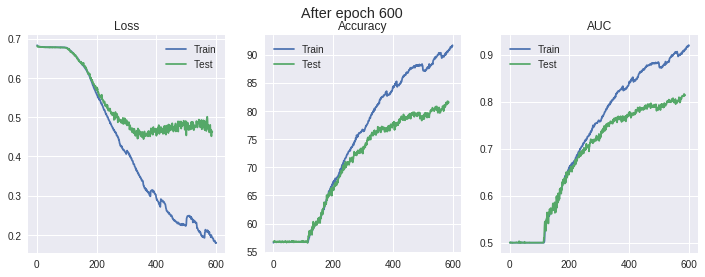

[defaultdict(list,
             {0: array([1, 1, 1, ..., 0, 1, 1], dtype=uint8),
              1: array([1, 1, 1, ..., 1, 1, 0], dtype=uint8)}),
 defaultdict(list,
             {0: array([1, 0, 1, ..., 1, 1, 0], dtype=uint8),
              1: array([1, 1, 1, ..., 0, 0, 1], dtype=uint8)}),
 defaultdict(list,
             {0: array([0, 1, 1, ..., 1, 1, 1], dtype=uint8),
              1: array([1, 1, 1, ..., 0, 1, 1], dtype=uint8)}),
 defaultdict(list,
             {0: array([1, 1, 0, ..., 1, 1, 0], dtype=uint8),
              1: array([1, 1, 0, ..., 1, 1, 1], dtype=uint8)}),
 defaultdict(list,
             {0: array([1, 1, 1, ..., 1, 1, 1], dtype=uint8),
              1: array([0, 1, 1, ..., 1, 1, 0], dtype=uint8)}),
 defaultdict(list,
             {0: array([1, 1, 1, ..., 1, 1, 1], dtype=uint8),
              1: array([0, 1, 0, ..., 1, 1, 1], dtype=uint8)})]

In [0]:
total_epochs = 600
wandb.config.update(dict(epochs=total_epochs), allow_val_change=True)

train(large_batch_dimension_unit_larger_pooling_dropout_CNN_MLP, train_dataloader, test_dataloader, 
      num_epochs=total_epochs - current_epoch, epochs_to_test=1, epochs_to_graph=10, 
      num_batches_to_print=2000, start_epoch=current_epoch)

## Create dataset with subset of tasks

In [0]:
np.random.seed(33)
NUM_TASKS = 10
task_subset = np.random.choice(np.arange(normalized_train_dataset.total_queries_per_image), 
                              NUM_TASKS, replace=False)
task_subset

array([17,  8, 15, 18,  5,  0, 11,  4, 19,  1])

In [0]:
subset_normalized_train_dataset = MetaLearningH5Dataset(META_LEARNING_DATA, # META_LEARNING_DATA_SMALL,
                                                           normalized_transformer,
                                                           end_index=TEST_TRAIN_SPLIT_INDEX,
                                                           query_subset=task_subset)
subset_train_dataloader = DataLoader(normalized_train_dataset, batch_size=BATCH_SIZE,
                              shuffle=True, num_workers=1, pin_memory=True)

subset_normalized_test_dataset = MetaLearningH5Dataset(META_LEARNING_DATA, # META_LEARNING_DATA_SMALL,
                                                          normalized_transformer,
                                                          start_index=TEST_TRAIN_SPLIT_INDEX,
                                                          query_subset=task_subset)
subset_test_dataloader = DataLoader(normalized_test_dataset, batch_size=BATCH_SIZE,
                             shuffle=True, num_workers=1, pin_memory=True)

print(len(subset_normalized_train_dataset), len(subset_normalized_test_dataset))

35840 5120


In [0]:
# TODO: consider implementing cosine annealing

current_epoch = 250

task_subset_mse_larger_pooling_dropout_CNN_MLP = PoolingDropoutCNN_MLP(
    conv_filter_sizes=(16, 32, 48, 64),
    conv_output_size=3072, 
    mlp_layer_sizes=(512, 512, 512, 512),
    lr=1e-4, 
    weight_decay=1e-4, use_mse=True,
    name='task_subset_mse_larger_pooling_dropout_CNN_MLP')
task_subset_mse_larger_pooling_dropout_CNN_MLP.load_model(current_epoch)
task_subset_mse_larger_pooling_dropout_CNN_MLP.cuda()
# summary(larger_pooling_dropout_model, [(3, 96, 128), (21,)])

512


PoolingDropoutCNN_MLP(
  (conv): PoolingDropoutConvInputModel(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchNorm1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchNorm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(32, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchNorm3): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv4): Conv2d(48, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchNorm4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc1): Linear(in_features=3093, out_features=512, bias=True)
  (fcout): SmallerDropoutFCOutputModel(
    (fc2): Linear(in_features=512, out_features=512, bias=True)
    (fc3): Linear(in_features=512, out_features=512, bias=T

In [0]:
os.environ['WANDB_RUN_ID'] = 'w579w5nq'
os.environ['WANDB_RESUME'] = 'must'
wandb.init(project="meta-learning")

wandb.config.epochs = 200
wandb.config.lr = 1e-4
wandb.config.decay = 1e-4
wandb.config.loss = 'MSE'
wandb.config.task_subset = [17,  8, 15, 18,  5,  0, 11,  4, 19,  1]

W&B Run: https://app.wandb.ai/None/meta-learning/runs/w579w5nq
Call `%%wandb` in the cell containing your training loop to display live results.


In [0]:
total_epochs = 300

train(task_subset_mse_larger_pooling_dropout_CNN_MLP, subset_train_dataloader, subset_test_dataloader, 
      num_epochs=total_epochs - current_epoch, epochs_to_test=1, epochs_to_graph=10, 
      num_batches_to_print=2000, start_epoch=current_epoch)

NameError: ignored

In [0]:
results = []

for i in range(300):
    for j in range(10):
        results.append(np.all(subset_normalized_train_dataset[i * 10 + j][0][1] == subset_normalized_train_dataset[(i + 1) * 10 + j][0][1]))
    
print(np.all(results))

True


In [0]:
train(pooling_dropout_decay_scheduler_model, train_dataloader, test_dataloader, 
      num_epochs=200,  epochs_to_test=1, epochs_to_graph=10, start_epoch=300,
      num_batches_to_print=1000)

In [0]:
DOWNSAMPLE_SIZE = (128, 128)

to_tensor = transforms.ToTensor()
resize = transforms.Resize(DOWNSAMPLE_SIZE)
to_pil = transforms.ToPILImage()

def transformer(img):
    return to_tensor(resize(to_pil(img))).float()

# dataset = MetaLearningH5Dataset(META_LEARNING_DATA)
dataset = MetaLearningH5Dataset(META_LEARNING_DATA_SMALL,
                                   transformer)
# TODO: once works, move to async/more workers
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE,
                        shuffle=True, num_workers=0)
# TODO: does it not work with more than one worker?
# TODO: try using pin_memory and see if it helps

model = CNN_MLP(dataset.query_length,  
                mlp_layer_sizes=(1024, 256, 64, 16),
                conv_output_size=1536)
model.cuda()
train(model, dataloader, 200, 1000)

### Try loading a model and testing it on some other data

In [0]:
DOWNSAMPLE_SIZE = (128, 128)

to_tensor = transforms.ToTensor()
resize = transforms.Resize(DOWNSAMPLE_SIZE)
to_pil = transforms.ToPILImage()

def transformer(img):
    return to_tensor(resize(to_pil(img))).float()

# dataset = MetaLearningH5Dataset(META_LEARNING_DATA)
dataset = MetaLearningH5Dataset(META_LEARNING_DATA_SMALL,
                                   transformer)
# TODO: once works, move to async/more workers
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE,
                        shuffle=True, num_workers=0)

model = CNN_MLP(dataset.query_length,  
                mlp_layer_sizes=(1024, 256, 64, 16),
                conv_output_size=1536)
model.cuda()
model.load_model(199)

In [0]:
full_dataset = MetaLearningH5Dataset(META_LEARNING_DATA,
                                        transformer)
# TODO: restore to True next time training
full_dataloader = DataLoader(full_dataset, batch_size=BATCH_SIZE,
                             shuffle=False, num_workers=0)

In [0]:
accuracies, losses, correct_per_query = test(model, full_dataloader, 1000)

In [0]:
props = dataset.file['properties']
for i in range(props.shape[0]):
    cpq = correct_per_query[i]
    print(f'For queries about {props[i]}, average test accuracy of {np.mean(cpq):.3f} ({np.sum(cpq)} / {cpq.shape[0]})')

    
num_colors = 10
num_shapes = 11

color_correct = 0
color_total = 0
for i in range(num_colors):
    color_correct += np.sum(correct_per_query[i])
    color_total += correct_per_query[i].shape[0]
    
shape_correct = 0
shape_total = 0
for i in range(num_shapes):
    shape_correct += np.sum(correct_per_query[num_colors + i])
    shape_total += correct_per_query[num_colors + i].shape[0]
    
print(f'Overall, in color queries, average test accuracy of {color_correct / color_total:.3f} ({color_correct} / {color_total})')
print(f'Overall, in shape queries, average test accuracy of {shape_correct / shape_total:.3f} ({shape_correct} / {shape_total})')
      

For queries about blue, average test accuracy of 0.713 (2922 / 4096)
For queries about brown, average test accuracy of 0.603 (2468 / 4096)
For queries about cyan, average test accuracy of 0.639 (2619 / 4096)
For queries about gray, average test accuracy of 0.585 (2396 / 4096)
For queries about green, average test accuracy of 0.672 (2752 / 4096)
For queries about orange, average test accuracy of 0.592 (2425 / 4096)
For queries about pink, average test accuracy of 0.657 (2690 / 4096)
For queries about purple, average test accuracy of 0.588 (2409 / 4096)
For queries about red, average test accuracy of 0.888 (3639 / 4096)
For queries about yellow, average test accuracy of 0.594 (2434 / 4096)
For queries about cone, average test accuracy of 0.591 (2170 / 3674)
For queries about cube, average test accuracy of 0.642 (1959 / 3052)
For queries about curved, average test accuracy of 0.683 (1685 / 2468)
For queries about cylinder, average test accuracy of 0.688 (1406 / 2044)
For queries about g1,

66.235


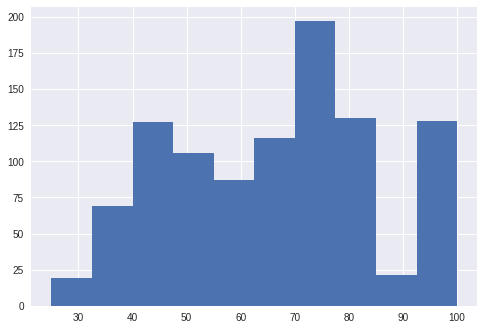

In [0]:
import matplotlib.pyplot as plt
print(np.mean(accuracies))
hist = plt.hist(accuracies)

## Trying exactly the network they ran on Sort-of-CLEVR

In [0]:
DOWNSAMPLE_SIZE = (128, 128)

to_tensor = transforms.ToTensor()
resize = transforms.Resize(DOWNSAMPLE_SIZE)
to_pil = transforms.ToPILImage()

def transformer(img):
    return to_tensor(resize(to_pil(img))).float()

# dataset = MetaLearningH5Dataset(META_LEARNING_DATA)
dataset = MetaLearningH5Dataset(META_LEARNING_DATA_SMALL,
                                   transformer)
# TODO: once works, move to async/more workers
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE,
                        shuffle=True, num_workers=0, pin_memory=True)
# TODO: does it not work with more than one worker?
# TODO: try using pin_memory and see if it helps

model = CNN_MLP(dataset.query_length,  
                conv_filter_sizes=(32, 64, 128, 256),
                mlp_layer_sizes=(2000, 1000, 500, 100),
                conv_output_size=16384)
model.cuda()
results = train(model, dataloader, 200, 200)

2018-11-15 12:59:25: After epoch 1, the average accuracy is 56.619 and the average loss is 0.684
2018-11-15 13:00:13: After epoch 2, the average accuracy is 56.696 and the average loss is 0.682
2018-11-15 13:01:04: After epoch 3, the average accuracy is 56.732 and the average loss is 0.681
2018-11-15 13:01:55: After epoch 4, the average accuracy is 56.714 and the average loss is 0.681
2018-11-15 13:02:46: After epoch 5, the average accuracy is 56.744 and the average loss is 0.680
2018-11-15 13:03:36: After epoch 6, the average accuracy is 56.673 and the average loss is 0.680
2018-11-15 13:04:28: After epoch 7, the average accuracy is 56.679 and the average loss is 0.680
2018-11-15 13:05:18: After epoch 8, the average accuracy is 56.679 and the average loss is 0.680
2018-11-15 13:06:08: After epoch 9, the average accuracy is 56.714 and the average loss is 0.679
2018-11-15 13:07:02: After epoch 10, the average accuracy is 56.696 and the average loss is 0.680
2018-11-15 13:07:53: After ep

# Scratch work

In [0]:
print(dataset.file['Q'][0, 7])
np.argmax(dataset.file['Q'][0, 7])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


17

In [0]:
import datetime
dt = datetime.datetime.now()

In [0]:
unnormalized_train_dataset

(240, 320, 3)


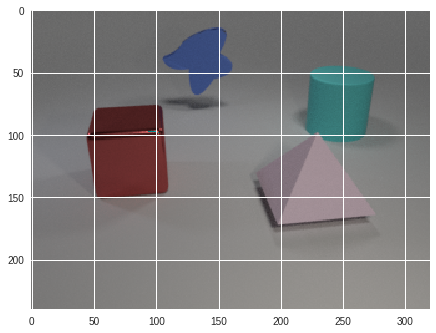

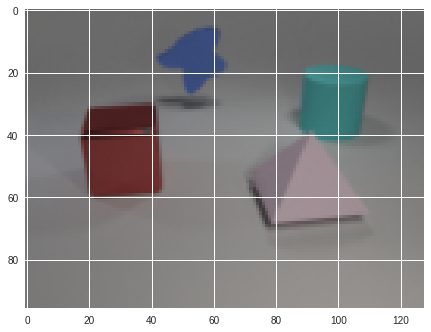

In [0]:
import matplotlib.pyplot as plt

DOWNSAMPLE_SIZE = (96, 128)

to_tensor = transforms.ToTensor()
resize = transforms.Resize(DOWNSAMPLE_SIZE)
to_pil = transforms.ToPILImage()

def resizer(img):
    return resize(to_pil(img))
dataset = MetaLearningH5Dataset(META_LEARNING_DATA_SMALL,
                                   resizer)
print(dataset.file['X'][100].shape)
plt.imshow(dataset.file['X'][100])
plt.show()
plt.imshow(resizer(dataset.file['X'][100]))
plt.show()

tensor([[[0.4118, 0.4118, 0.4157,  ..., 0.4078, 0.4039, 0.4039],
         [0.4118, 0.4118, 0.4118,  ..., 0.4078, 0.4078, 0.4039],
         [0.4118, 0.4118, 0.4118,  ..., 0.4039, 0.4039, 0.4039],
         ...,
         [0.4706, 0.4745, 0.4706,  ..., 0.5686, 0.5686, 0.5686],
         [0.4745, 0.4706, 0.4745,  ..., 0.5686, 0.5686, 0.5686],
         [0.4706, 0.4706, 0.4745,  ..., 0.5725, 0.5686, 0.5686]],

        [[0.4078, 0.4118, 0.4157,  ..., 0.4078, 0.4039, 0.4039],
         [0.4078, 0.4078, 0.4118,  ..., 0.4078, 0.4078, 0.4039],
         [0.4118, 0.4118, 0.4118,  ..., 0.4039, 0.4039, 0.4039],
         ...,
         [0.4667, 0.4706, 0.4667,  ..., 0.5569, 0.5608, 0.5569],
         [0.4667, 0.4667, 0.4706,  ..., 0.5608, 0.5608, 0.5608],
         [0.4667, 0.4667, 0.4706,  ..., 0.5608, 0.5608, 0.5569]],

        [[0.4078, 0.4118, 0.4118,  ..., 0.4078, 0.4039, 0.4039],
         [0.4078, 0.4078, 0.4118,  ..., 0.4078, 0.4039, 0.4039],
         [0.4078, 0.4118, 0.4118,  ..., 0.4039, 0.4039, 0.

In [0]:
np.cast?
dataset.file['X'][100].dtype

dtype('<f8')

In [0]:
dataset.file['X'][100]

In [0]:
!apt-get install -y -qq gpustat

E: Unable to locate package gpustat


In [0]:
t = torch.rand((4, 4)).numpy()
print(t)
num_classes = 4
correct = [0, 0, 2, 2]

[[0.9064657  0.97079206 0.69706684 0.87157816]
 [0.7866388  0.69764864 0.98198307 0.58196664]
 [0.68014616 0.9411912  0.09706616 0.9728676 ]
 [0.61758286 0.02640218 0.77136165 0.6011839 ]]


In [0]:
ind = num_classes - np.argsort(np.argsort(t, 1), 1)
print(ind[np.arange(4), correct])

[2 2 4 1]
